<a href="https://colab.research.google.com/github/hlepushe/comparative-genetics_HW/blob/main/Kimura_plot_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Добро пожаловать в Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Новое&#41; Попробуйте Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Загрузка файла RepeatMasker
columns = [
    "SW_score", "Perc_Div", "Perc_Del", "Perc_Ins", "Query_sequence",
    "Query_begin", "Query_end", "Query_left", "Matching_repeat",
    "Repeat_class/family", "Repeat_begin", "Repeat_end", "Repeat_left", "ID"
]
data = pd.read_csv("chr4_sample_2.fasta.out.txt", skiprows=3, delim_whitespace=True, names=columns)

<ipython-input-7-dd094396a39b>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("chr4_sample_2.fasta.out.txt", skiprows=3, delim_whitespace=True, names=columns)


In [8]:
# Преобразование % Div. в числовой формат
data['Perc_Div'] = pd.to_numeric(data['Perc_Div'], errors='coerce')

In [9]:
# Группировка данных по проценту дивергенции
divergence = data['Perc_Div'].dropna().round().value_counts().sort_index()

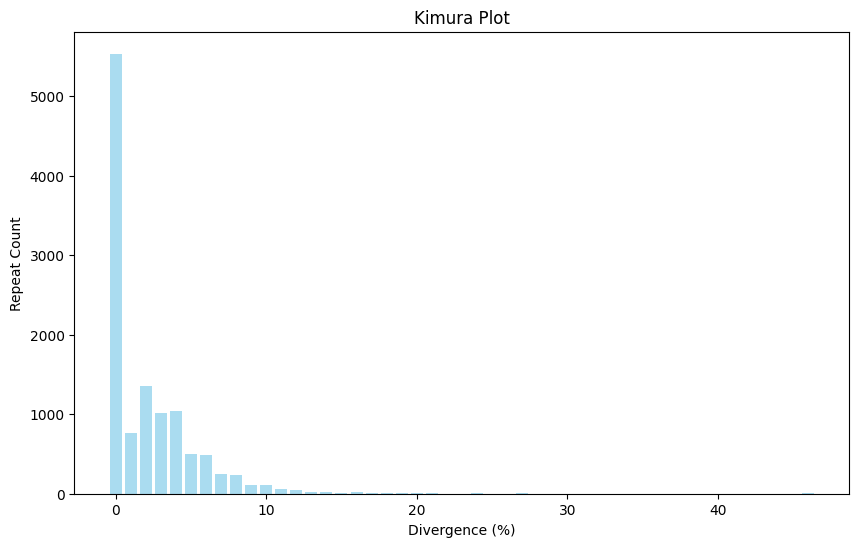

In [10]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(divergence.index, divergence.values, color='skyblue', alpha=0.7)
plt.title('Kimura Plot')
plt.xlabel('Divergence (%)')
plt.ylabel('Repeat Count')
plt.show()

<ipython-input-15-b4424a193357>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


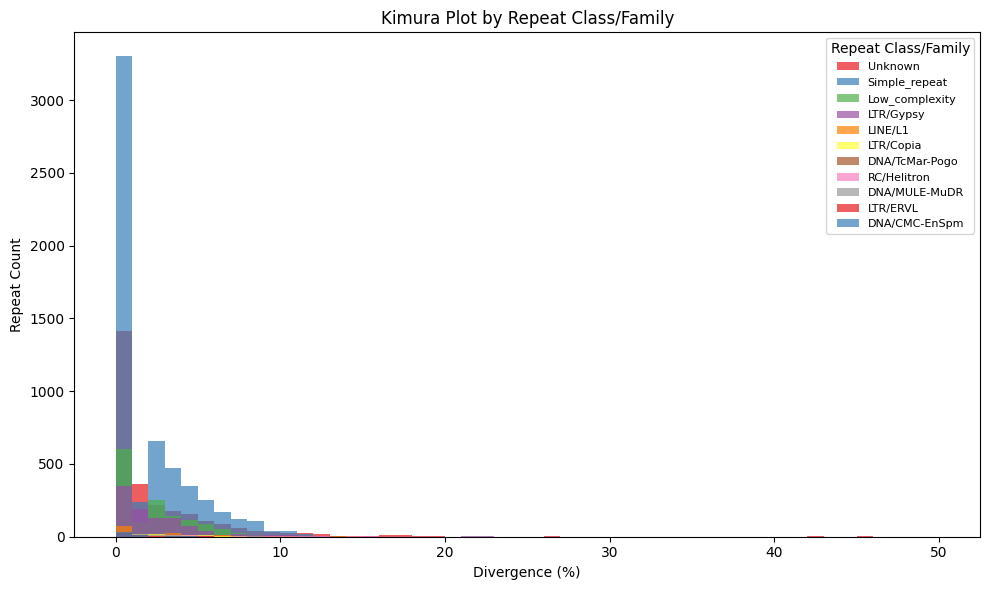

In [15]:
# Читаем файл .out
data = pd.read_csv(
    "chr4_sample_2.fasta.out.txt",
    delim_whitespace=True,
    skiprows=3,
    names=[
        "SW_score", "Perc_Div", "Perc_Del", "Perc_Ins", "Query_sequence",
        "Query_begin", "Query_end", "Query_left", "Matching_repeat",
        "Repeat_class/family", "Repeat_begin", "Repeat_end", "Repeat_left", "ID"
    ]
)


# Берем только два столбца: дивергенцию и класс/семейство
divergence_data = data[["Perc_Div", "Repeat_class/family"]]

# Группируем данные по классу/семейству повторов
classes = divergence_data["Repeat_class/family"].unique()

# Цвета для каждого класса (если классов больше, чем цветов, они будут повторяться)
colors = plt.cm.Set1.colors
class_colors = {cls: colors[i % len(colors)] for i, cls in enumerate(classes)}

# Построение графика
plt.figure(figsize=(10, 6))

# Для каждого класса строим отдельную гистограмму
for cls in classes:
    subset = divergence_data[divergence_data["Repeat_class/family"] == cls]
    plt.hist(
        subset["Perc_Div"],
        bins=50,
        range=(0, 50),
        alpha=0.7,
        label=cls,
        color=class_colors[cls]
    )

# Настройка графика
plt.title("Kimura Plot by Repeat Class/Family")
plt.xlabel("Divergence (%)")
plt.ylabel("Repeat Count")
plt.legend(title="Repeat Class/Family", loc='upper right', fontsize=8)
plt.tight_layout()

# Сохранение или отображение графика
plt.savefig("kimura_plot_by_class_1.png")
plt.show()
